In [16]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot



In [17]:
import sys
import os

# Add the path to src/ so Python can find your modules
sys.path.append(r'C:\Users\pc\Desktop\cs229_ps1\src')

# Now you can import
from linear_model import LinearModel
import util

# Load data
x_train, y_train = util.load_dataset(r'C:\Users\pc\Desktop\cs229_ps1\data\ds1_train.csv', add_intercept=True)
x_valid, y_valid = util.load_dataset(r'C:\Users\pc\Desktop\cs229_ps1\data\ds1_valid.csv', add_intercept=True)


In [33]:
class logestic_newton(LinearModel):
    def fit(self,x,y):
        def h(theta,x):
            return 1/(1 + np.exp(-np.dot(x, theta)))
        def gradient(theta,x,y):
            m,_=x.shape
            return (-1/m)*np.dot(x.T,y - h(theta,x))
        def Hessian(theta,x):
            m,_=x.shape
            h_theta_x = h(theta, x)
            S = np.diag((h_theta_x * (1 - h_theta_x)))
            return (1/m) * np.dot(x.T, np.dot(S, x))
        def update_theta(theta,x,y):
            return theta - np.dot(np.linalg.inv(Hessian(theta,x)), gradient(theta,x,y))
        m,n=x.shape
        self.err=0.001
        self.theta=np.zeros(n)
        old_theta=self.theta
        new_theta=update_theta(old_theta,x,y)
        while np.linalg.norm(old_theta-new_theta,1) >= self.err:
            self.theta=new_theta
            old_theta=self.theta
            new_theta=update_theta(old_theta,x,y)
        self.theta=new_theta

    def predict(self,x):
        pred = 1/(1 + np.exp(-np.dot(x, self.theta)))
        return (pred >= 0.5).astype(int)


The accuracy on training set is: 0.8825


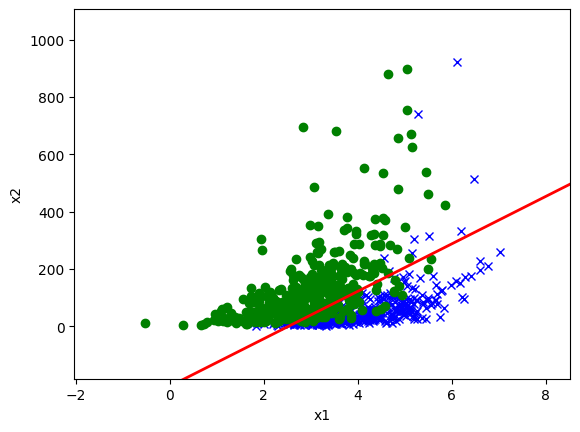

In [35]:
model = logestic_newton()
model.fit(x_train, y_train)
util.plot(x_train,y_train,theta=model.theta)
print("The accuracy on training set is:", np.mean(model.predict(x_train) == y_train))


The accuracy on validation set is:  0.9


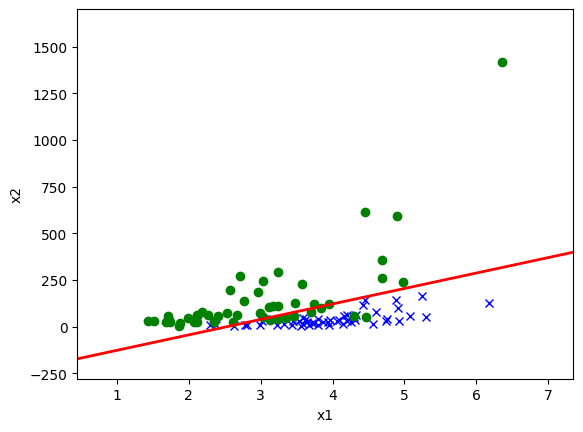

In [38]:
util.plot(x_valid, y_valid, model.theta)
print("The accuracy on validation set is: ", np.mean(model.predict(x_valid) == y_valid))